In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df1=pd.read_csv("Zomato.csv")
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
columns_new=['Restaurant ID', 'Restaurant Name','City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes','Country Code',]

In [5]:
df1_new=df1.reindex(columns=columns_new)
df1_new

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,162
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,162
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,162
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,162
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,...,No,No,No,No,3,4.1,Green,Very Good,788,208
9547,5908749,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,No,3,4.2,Green,Very Good,1034,208
9548,5915807,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,No,4,3.7,Yellow,Good,661,208
9549,5916112,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,No,4,4.0,Green,Very Good,901,208


In [6]:
df1_new.nunique()

Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country Code              15
dtype: int64

In [7]:
df2=pd.read_csv("countrycode.csv")
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [8]:
df2.nunique()

Country Code    15
Country         15
dtype: int64

In [9]:
df=pd.merge(df1_new,df2)
df

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,4.8,Dark Green,Excellent,314,162,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,No,No,No,3,4.5,Dark Green,Excellent,591,162,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4.4,Green,Very Good,270,162,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,4.9,Dark Green,Excellent,365,162,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,4.8,Dark Green,Excellent,229,162,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,...,No,No,No,3,4.1,Green,Very Good,788,208,Turkey
9547,5908749,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,3,4.2,Green,Very Good,1034,208,Turkey
9548,5915807,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,4,3.7,Yellow,Good,661,208,Turkey
9549,5916112,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,4,4.0,Green,Very Good,901,208,Turkey


In [10]:
df.sample()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
7253,301517,Ram Chinese Food,New Delhi,"BB-80/A, West Shalimar Bagh, Shalimar Bagh, Ne...",Shalimar Bagh,"Shalimar Bagh, New Delhi",77.156965,28.715212,"Chinese, Fast Food",400,...,No,No,No,1,3.1,Orange,Average,23,1,India


In [11]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country Code              int64
Country                  object
dtype: object

In [12]:
le=LabelEncoder()
df['Restaurant Name']=le.fit_transform(df['Restaurant Name'])

In [13]:
df['City']=le.fit_transform(df['City'])

In [14]:
df['Address']=le.fit_transform(df['Address'])

In [15]:
df['Locality']=le.fit_transform(df['Locality'])

In [16]:
df['Locality Verbose']=le.fit_transform(df['Locality Verbose'])

In [17]:
df['Cuisines']=le.fit_transform(df['Cuisines'])

In [18]:
df['Currency']=le.fit_transform(df['Currency'])

In [19]:
df['Has Table booking']=le.fit_transform(df['Has Table booking'])

In [20]:
df['Has Online delivery']=le.fit_transform(df['Has Online delivery'])

In [21]:
df['Is delivering now']=le.fit_transform(df['Is delivering now'])

In [22]:
df['Switch to order menu']=le.fit_transform(df['Switch to order menu'])

In [23]:
df['Rating color']=le.fit_transform(df['Rating color'])

In [24]:
df['Rating text']=le.fit_transform(df['Rating text'])

In [25]:
df['Country']=le.fit_transform(df['Country'])

In [26]:
df

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
0,6317637,3749,73,8685,171,172,121.027535,14.565443,920,1100,...,0,0,0,3,4.8,0,1,314,162,6
1,6304287,3173,73,6055,593,601,121.014101,14.553708,1111,1200,...,0,0,0,3,4.5,0,1,591,162,6
2,6300002,2897,75,4684,308,314,121.056831,14.581404,1671,4000,...,0,0,0,4,4.4,1,5,270,162,6
3,6318506,4707,75,8690,862,875,121.056475,14.585318,1126,1500,...,0,0,0,4,4.9,0,1,365,162,6
4,6314302,5523,75,8689,862,875,121.057508,14.584450,1122,1500,...,0,0,0,4,4.8,0,1,229,162,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,140,5926,517,523,28.977392,41.022793,1813,80,...,0,0,0,3,4.1,1,5,788,208,11
9547,5908749,1311,140,5962,552,558,29.041297,41.009847,1824,105,...,0,0,0,3,4.2,1,5,1034,208,11
9548,5915807,3069,140,5966,554,561,29.034640,41.055817,1110,170,...,0,0,0,4,3.7,5,2,661,208,11
9549,5916112,513,140,5967,554,561,29.036019,41.057979,1657,120,...,0,0,0,4,4.0,1,5,901,208,11


In [27]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country Code            0
Country                 0
dtype: int64

<AxesSubplot:>

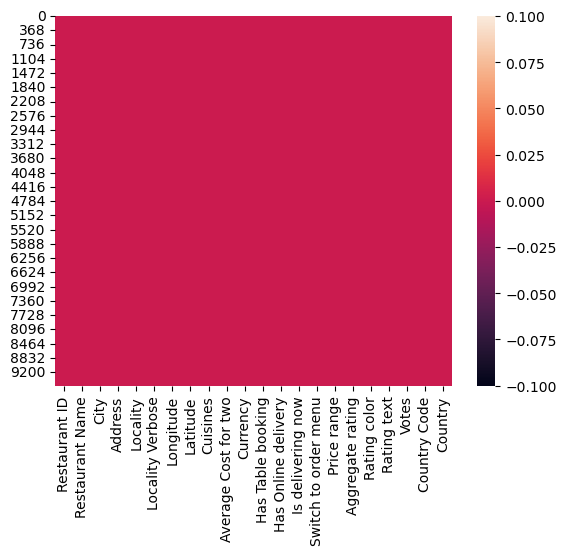

In [28]:
sns.heatmap(df.isnull())

The above heatmap shows that, there are no null values present in the data.

In [29]:
df.describe()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,...,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,78.301434,4542.439430,658.128678,677.305204,64.126574,25.854381,989.95079,1199.210763,...,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,18.365616,3.736781
std,8.791521e+06,2142.917876,23.198915,2565.717005,315.866877,331.727817,41.467058,11.007935,514.72354,16121.183073,...,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,56.750546,2.651963
min,5.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.019625e+05,1777.500000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,250.000000,...,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,1.000000,3.000000
50%,6.004089e+06,3595.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,400.000000,...,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,1.000000,3.000000
75%,1.835229e+07,5485.500000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,700.000000,...,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,1.000000,3.000000
max,1.850065e+07,7445.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,800000.000000,...,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,216.000000,14.000000


From the above description, we can see that the mean values are more than modedian values for almost all the features.
We can also that, the difference between max values and 75% values is large in some fearures, which shows the presence of outliers in the data.
We can also observe the values of count, 25%, standard deviation from the above table.

<AxesSubplot:>

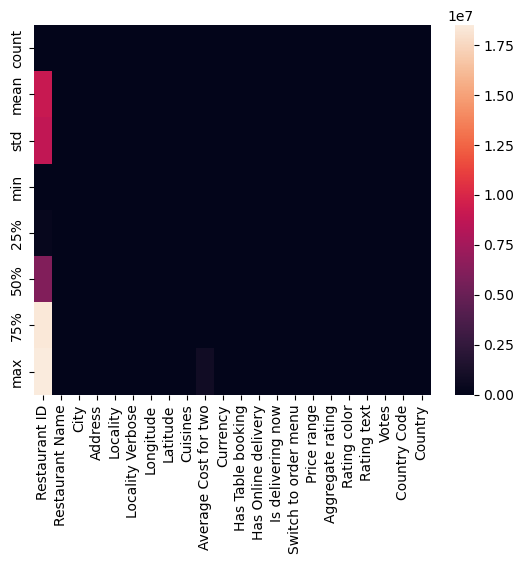

In [30]:
sns.heatmap(df.describe())

In [31]:
df.corr()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
Restaurant ID,1.000000,0.003999,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,-0.077664,-0.001693,...,-0.085089,0.012548,NaN,-0.134540,-0.326212,0.130540,0.251114,-0.147023,0.148471,0.161763
Restaurant Name,0.003999,1.000000,-0.001400,0.000764,0.004322,0.004281,-0.001920,0.009922,0.051496,0.019241,...,0.028081,0.011984,NaN,0.061275,0.029367,-0.007312,0.012132,0.018512,0.020013,0.017561
City,-0.005844,-0.001400,1.000000,-0.019763,0.096443,0.093141,0.117391,-0.004301,0.025764,-0.028838,...,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.181728,-0.180959
Address,0.080615,0.000764,-0.019763,1.000000,0.159556,0.160496,0.185801,-0.038654,0.022833,0.022749,...,0.029874,0.031267,NaN,-0.034952,-0.151153,0.071264,-0.008029,-0.101754,-0.220342,-0.235815
Locality,0.069511,0.004322,0.096443,0.159556,1.000000,0.999465,0.086446,-0.020428,0.006500,-0.012136,...,-0.030993,-0.007299,NaN,-0.114457,-0.174336,0.036832,-0.036969,-0.123569,-0.120076,-0.118786
Locality Verbose,0.070102,0.004281,0.093141,0.160496,0.999465,1.000000,0.084340,-0.020909,0.005483,-0.011852,...,-0.031766,-0.007353,NaN,-0.112311,-0.173253,0.037104,-0.035430,-0.122877,-0.117543,-0.116408
Longitude,-0.226081,-0.001920,0.117391,0.185801,0.086446,0.084340,1.000000,0.043207,0.122457,0.045891,...,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.698299,-0.766221
Latitude,-0.052081,0.009922,-0.004301,-0.038654,-0.020428,-0.020909,0.043207,1.000000,0.038646,-0.111088,...,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.019792,0.181299
Cuisines,-0.077664,0.051496,0.025764,0.022833,0.006500,0.005483,0.122457,0.038646,1.000000,0.005755,...,-0.017180,0.007708,NaN,-0.005489,-0.079494,-0.016180,-0.080025,-0.032362,-0.129451,-0.124141
Average Cost for two,-0.001693,0.019241,-0.028838,0.022749,-0.012136,-0.011852,0.045891,-0.111088,0.005755,1.000000,...,-0.018974,-0.001862,NaN,0.075083,0.051792,-0.049970,0.031439,0.067783,0.043225,-0.004034


<AxesSubplot:>

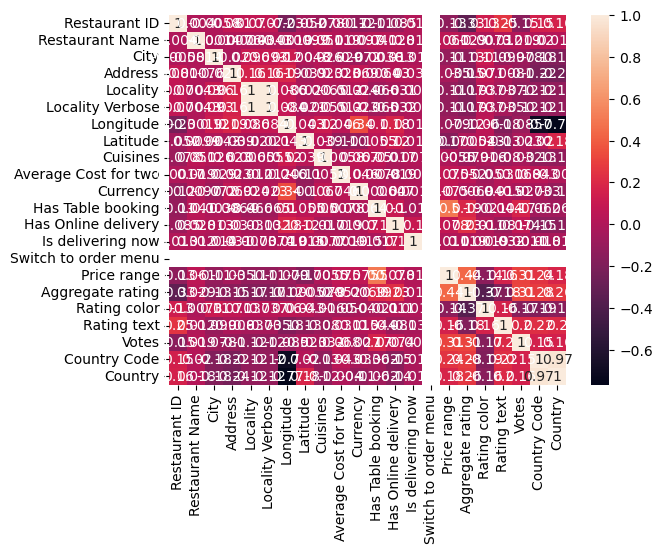

In [32]:
sns.heatmap(df.corr(),annot=True)

The above heatmap shows the correlation between all the features with each other.

<AxesSubplot:xlabel='Restaurant ID', ylabel='Count'>

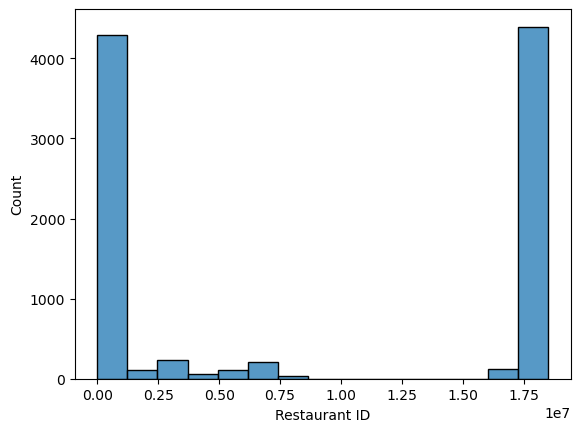

In [33]:
sns.histplot(df['Restaurant ID'])

<AxesSubplot:xlabel='Restaurant Name', ylabel='Count'>

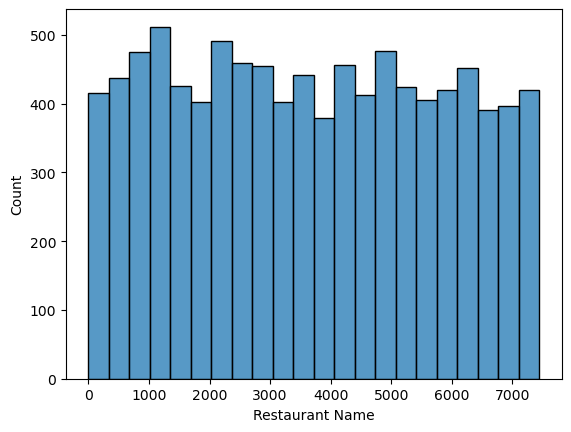

In [34]:
sns.histplot(df['Restaurant Name'])

<AxesSubplot:xlabel='City', ylabel='Count'>

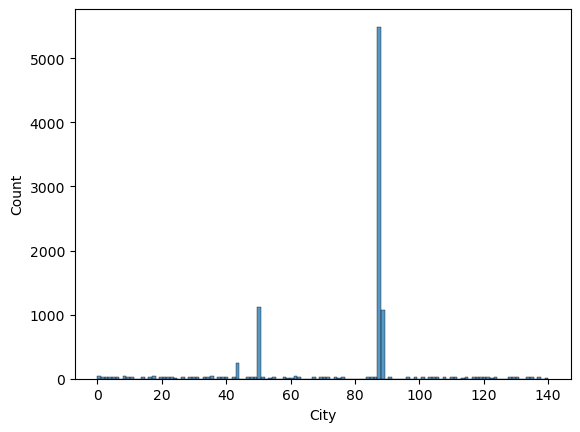

In [35]:
sns.histplot(df['City'])

<AxesSubplot:xlabel='Address', ylabel='Count'>

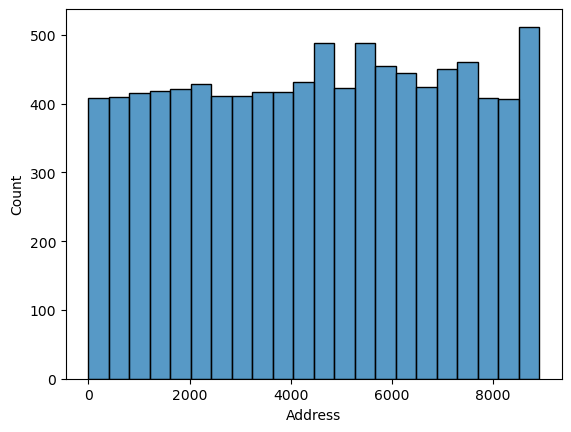

In [36]:
sns.histplot(df['Address'])

<AxesSubplot:xlabel='Locality', ylabel='Count'>

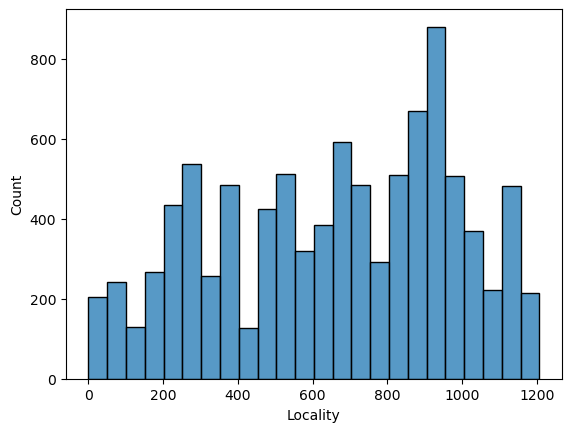

In [37]:
sns.histplot(df['Locality'])

<AxesSubplot:xlabel='Locality Verbose', ylabel='Count'>

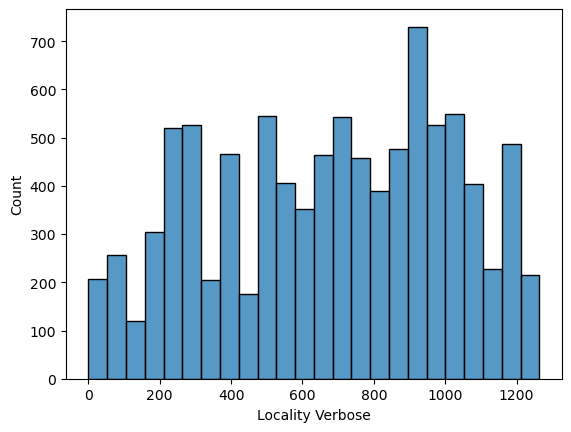

In [38]:
sns.histplot(df['Locality Verbose'])

<AxesSubplot:xlabel='Longitude', ylabel='Count'>

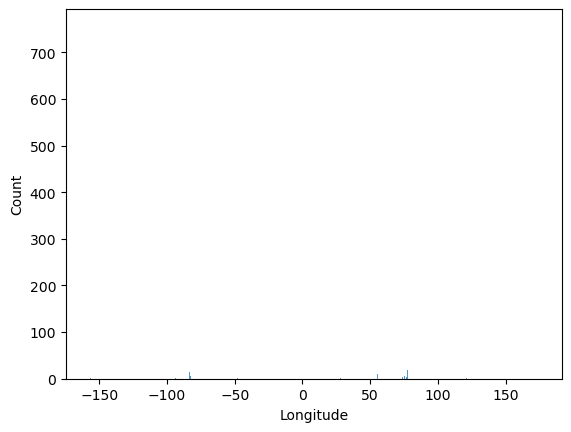

In [39]:
sns.histplot(df['Longitude'])

<AxesSubplot:xlabel='Latitude', ylabel='Count'>

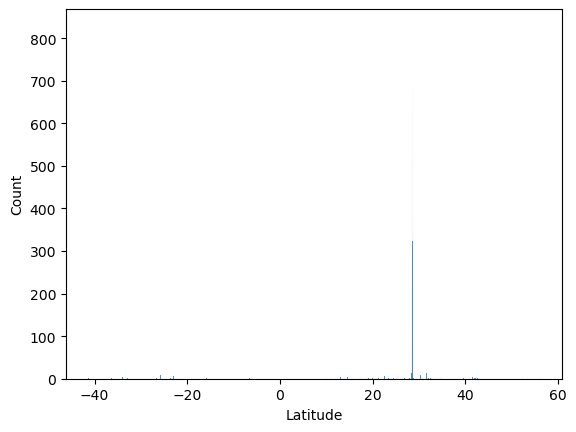

In [40]:
sns.histplot(df['Latitude'])

<AxesSubplot:xlabel='Cuisines', ylabel='Count'>

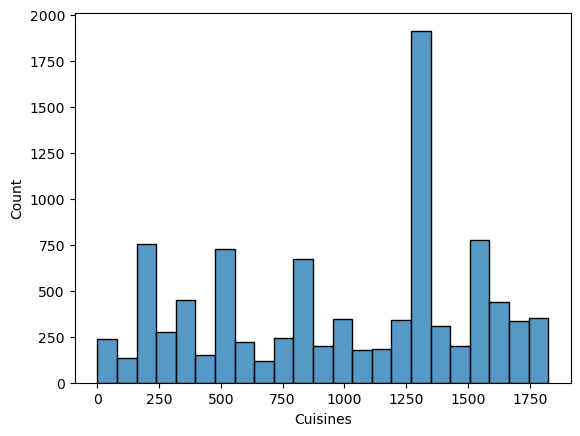

In [41]:
sns.histplot(df['Cuisines'])

<AxesSubplot:xlabel='Average Cost for two', ylabel='Count'>

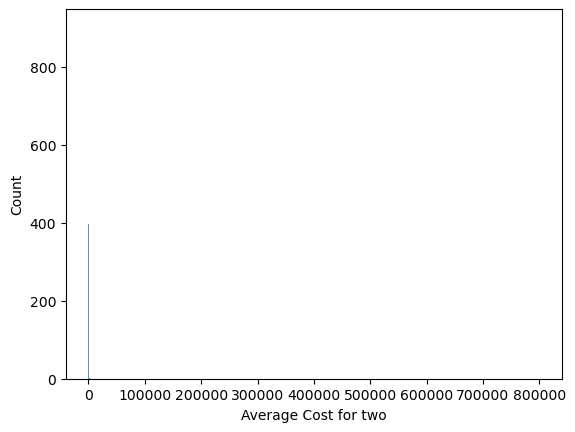

In [42]:
sns.histplot(df['Average Cost for two'])

<AxesSubplot:xlabel='Currency', ylabel='Count'>

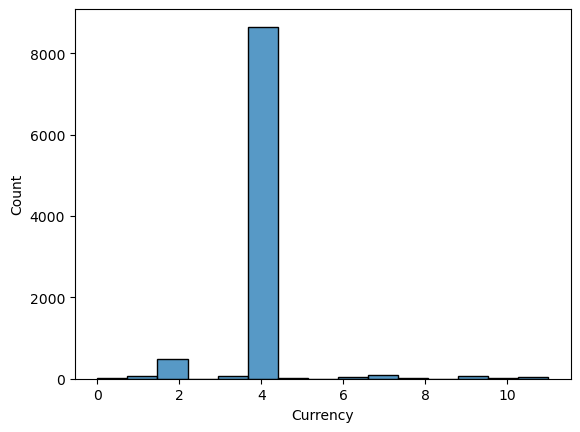

In [43]:
sns.histplot(df['Currency'])

<AxesSubplot:xlabel='Has Table booking', ylabel='Count'>

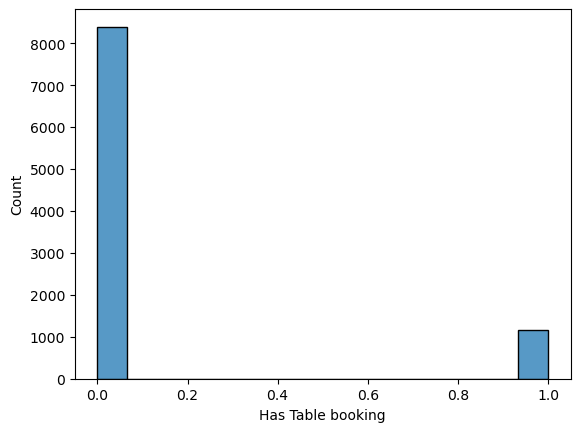

In [44]:
sns.histplot(df['Has Table booking'])

<AxesSubplot:xlabel='Has Online delivery', ylabel='Count'>

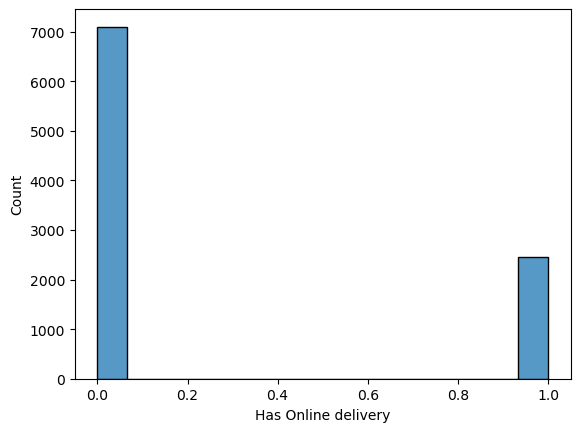

In [45]:
sns.histplot(df['Has Online delivery'])

<AxesSubplot:xlabel='Is delivering now', ylabel='Count'>

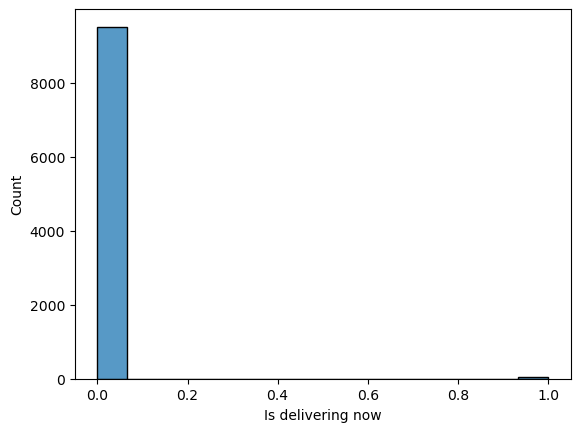

In [46]:
sns.histplot(df['Is delivering now'])

<AxesSubplot:xlabel='Switch to order menu', ylabel='Count'>

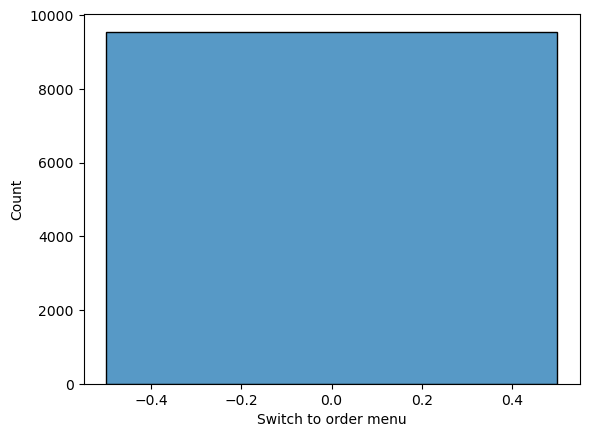

In [47]:
sns.histplot(df['Switch to order menu'])

<AxesSubplot:xlabel='Price range', ylabel='Count'>

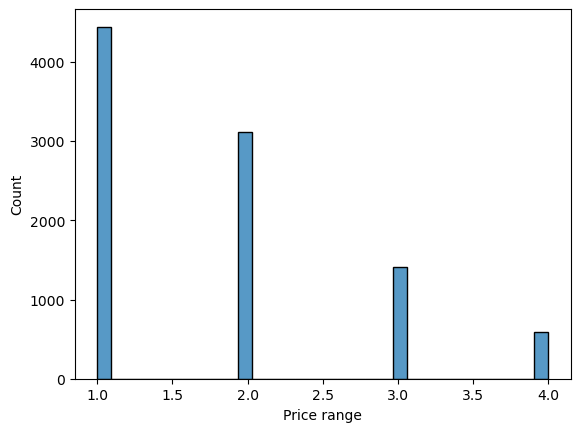

In [48]:
sns.histplot(df['Price range'])

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

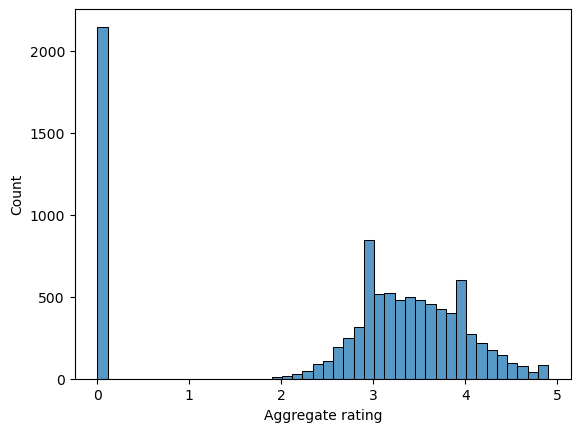

In [49]:
sns.histplot(df['Aggregate rating'])

<AxesSubplot:xlabel='Rating color', ylabel='Count'>

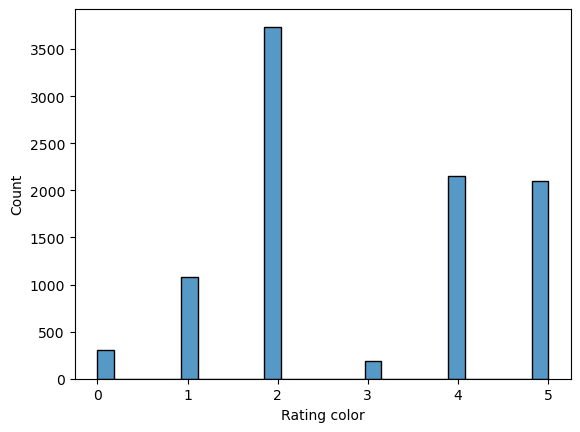

In [50]:
sns.histplot(df['Rating color'])

<AxesSubplot:xlabel='Rating text', ylabel='Count'>

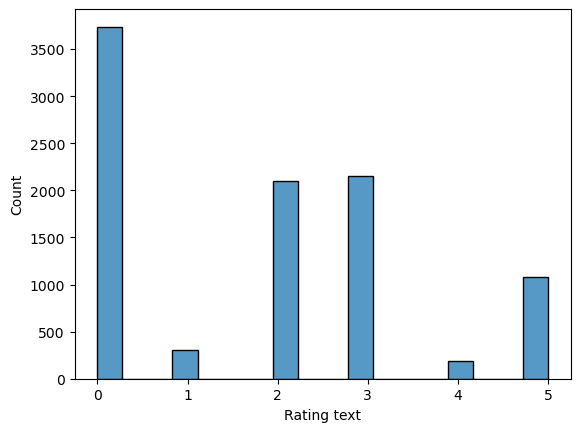

In [51]:
sns.histplot(df['Rating text'])

<AxesSubplot:xlabel='Votes', ylabel='Count'>

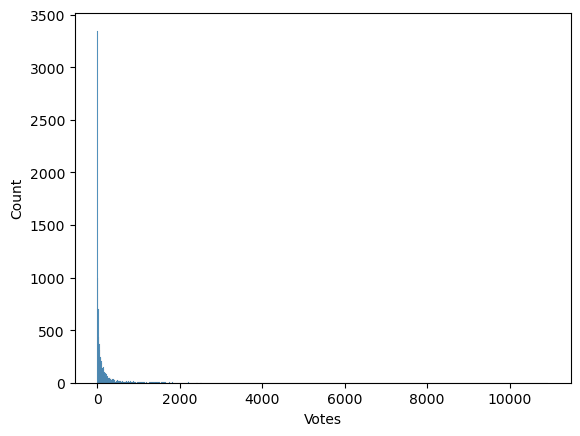

In [52]:
sns.histplot(df['Votes'])

<AxesSubplot:xlabel='Country Code', ylabel='Count'>

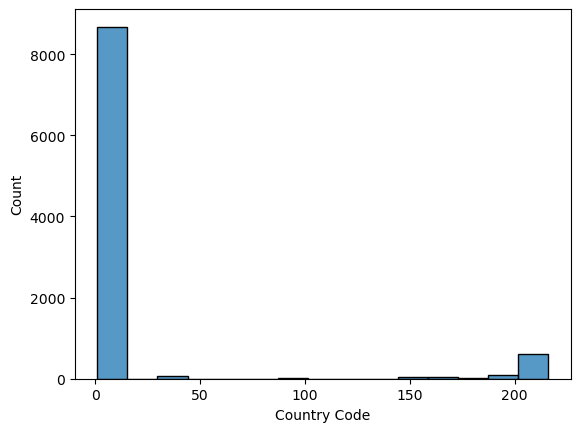

In [53]:
sns.histplot(df['Country Code'])

In [54]:
df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253550
Locality Verbose        -0.183059
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country Code             3.043965
Country                  3.312721
dtype: float64

In [55]:
df['Currency']=np.sqrt(df['Currency'])

In [56]:
df['Has Table booking']=np.sqrt(df['Has Table booking'])

In [57]:
df['Has Online delivery']=np.sqrt(df['Has Online delivery'])

In [58]:
df['Is delivering now']=np.sqrt(df['Is delivering now'])

In [59]:
df['Votes']=np.sqrt(df['Votes'])

In [60]:
df['Country Code']=np.sqrt(df['Country Code'])

In [61]:
df['Country']=np.sqrt(df['Country'])

In [62]:
df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253550
Locality Verbose        -0.183059
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                -0.819590
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    2.518922
Country Code             2.960357
Country                  2.917429
dtype: float64

In [63]:
df['Has Table booking']=np.cbrt(df['Has Table booking'])

In [64]:
df['Has Online delivery']=np.cbrt(df['Has Online delivery'])

In [65]:
df['Is delivering now']=np.cbrt(df['Is delivering now'])

In [66]:
df['Votes']=np.cbrt(df['Votes'])

In [67]:
df['Country Code']=np.cbrt(df['Country Code'])

In [68]:
df['Country']=np.cbrt(df['Country'])

In [69]:
df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253550
Locality Verbose        -0.183059
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                -0.819590
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                   -0.399093
Country Code             2.885565
Country                 -1.923418
dtype: float64

We have tried to remove the presence of skewness in the data with the help of CBRT method.

Now we will move forward to check the presence of of outliers in the data.

<AxesSubplot:>

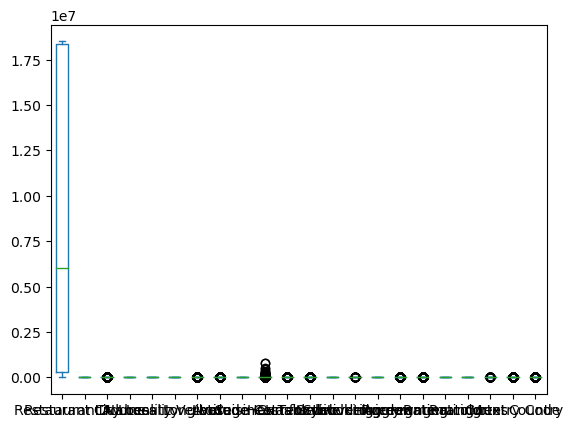

In [70]:
df.plot.box()

<AxesSubplot:>

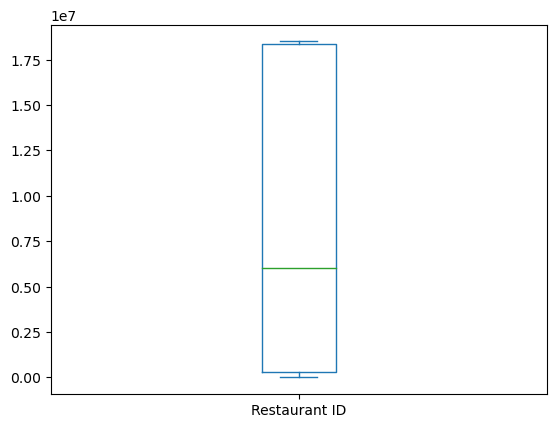

In [71]:
df['Restaurant ID'].plot.box()

<AxesSubplot:>

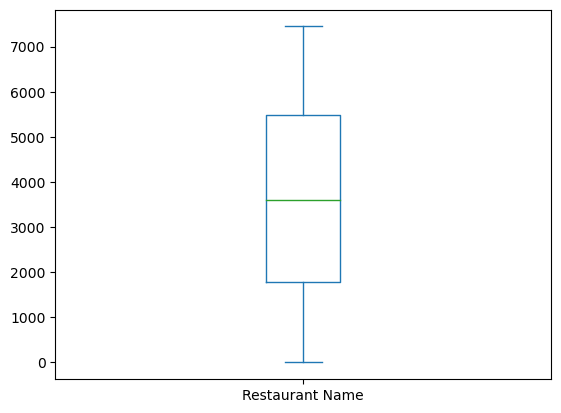

In [72]:
df['Restaurant Name'].plot.box()

<AxesSubplot:>

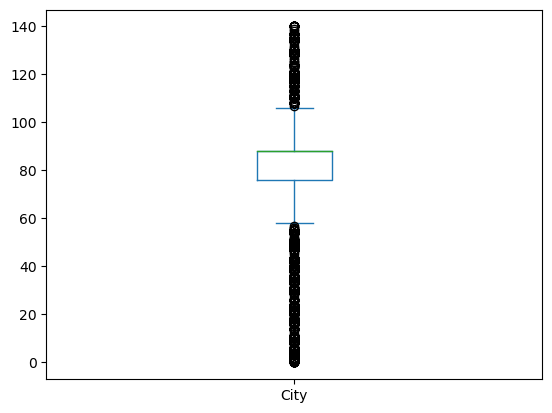

In [73]:
df['City'].plot.box()

<AxesSubplot:>

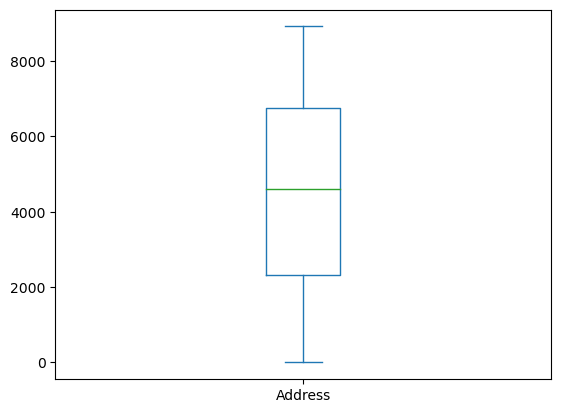

In [74]:
df['Address'].plot.box()

<AxesSubplot:>

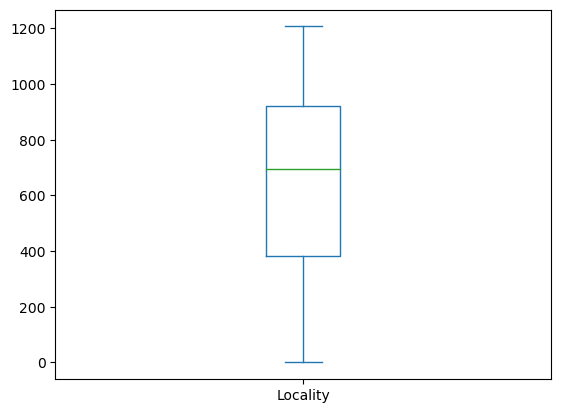

In [75]:
df['Locality'].plot.box()

<AxesSubplot:>

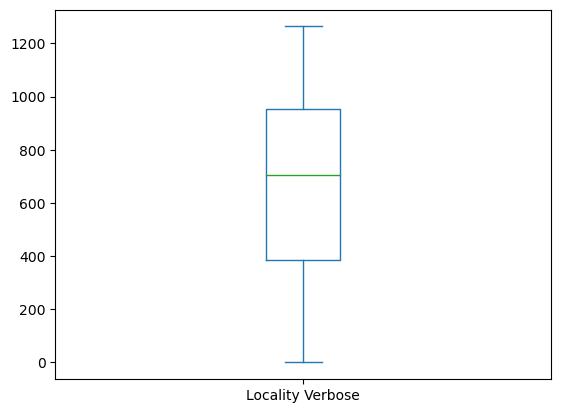

In [76]:
df['Locality Verbose'].plot.box()

<AxesSubplot:>

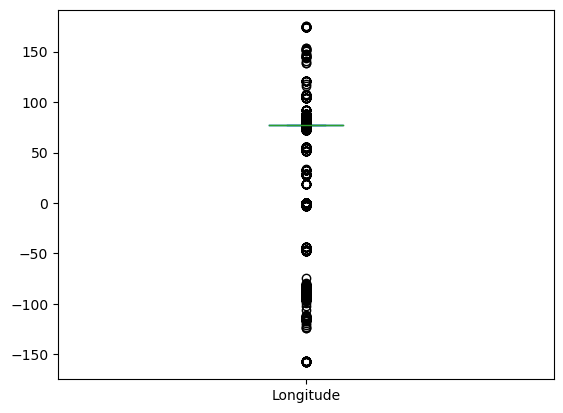

In [77]:
df['Longitude'].plot.box()

<AxesSubplot:>

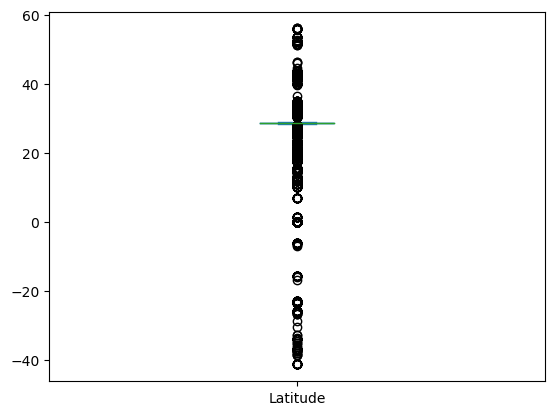

In [78]:
df['Latitude'].plot.box()

<AxesSubplot:>

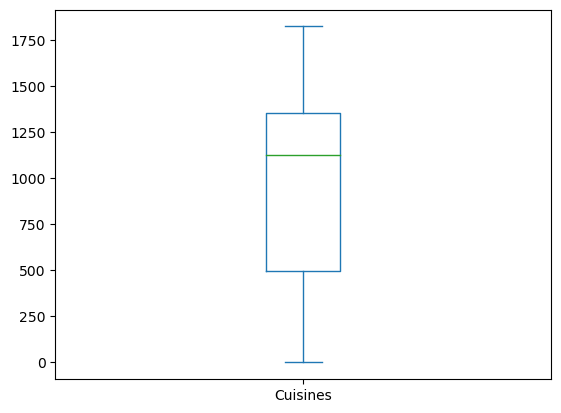

In [79]:
df['Cuisines'].plot.box()

<AxesSubplot:>

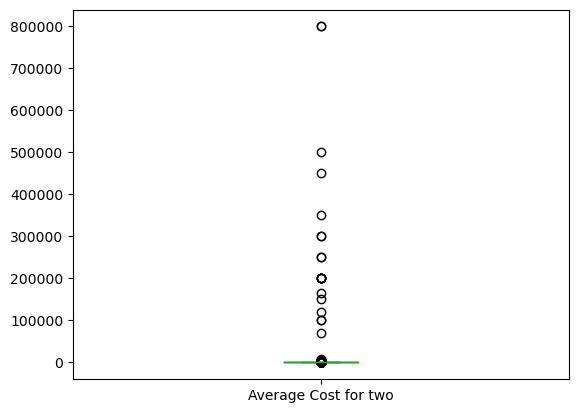

In [80]:
df['Average Cost for two'].plot.box()

<AxesSubplot:>

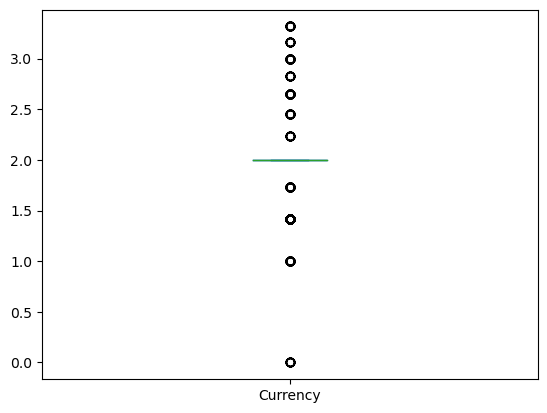

In [81]:
df['Currency'].plot.box()

<AxesSubplot:>

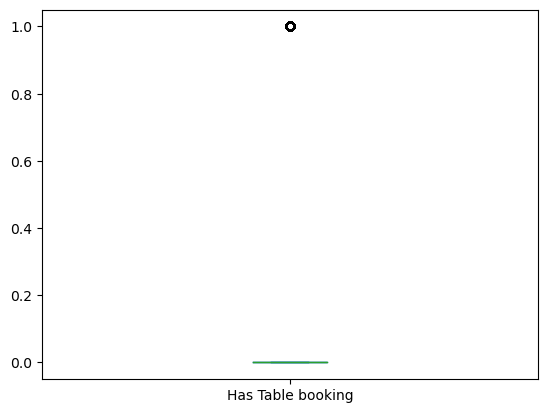

In [82]:
df['Has Table booking'].plot.box()

<AxesSubplot:>

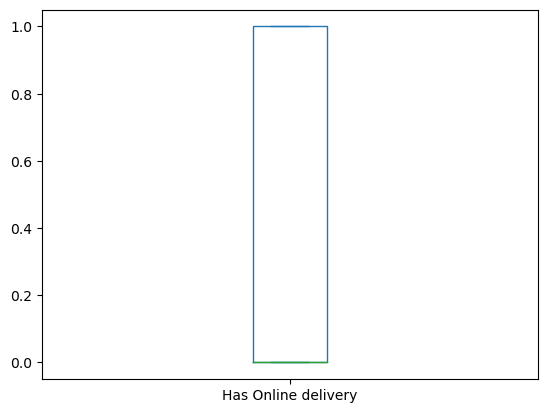

In [83]:
df['Has Online delivery'].plot.box()

<AxesSubplot:>

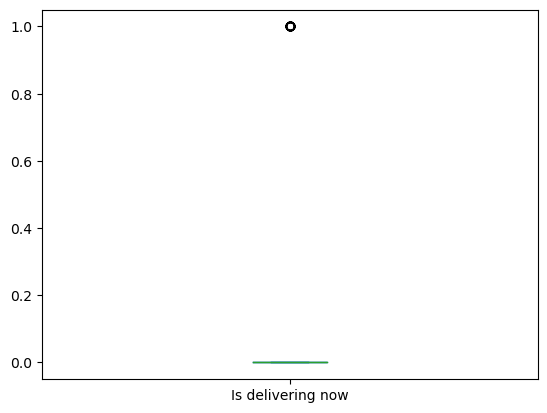

In [84]:
df['Is delivering now'].plot.box()

<AxesSubplot:>

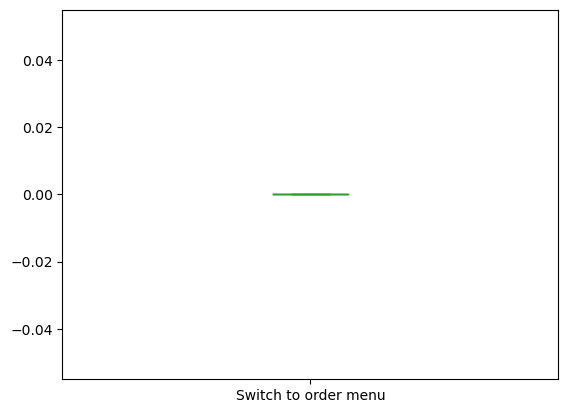

In [85]:
df['Switch to order menu'].plot.box()

<AxesSubplot:>

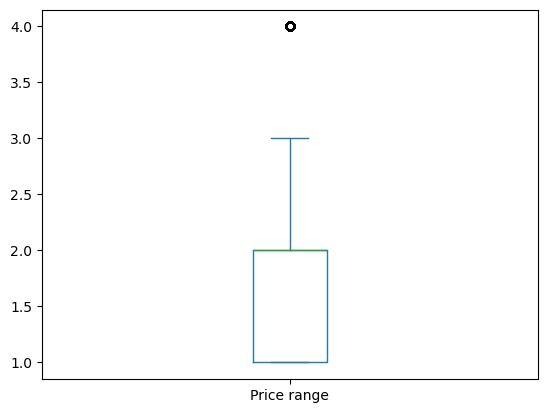

In [86]:
df['Price range'].plot.box()

<AxesSubplot:>

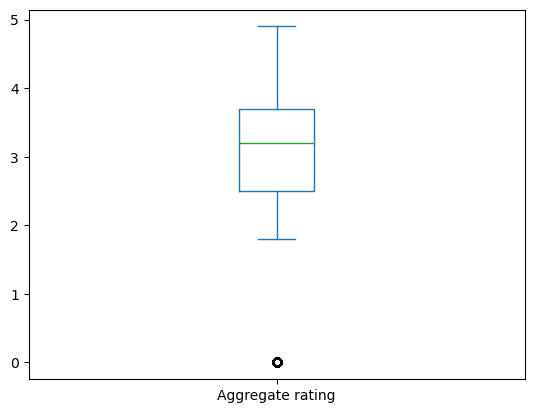

In [87]:
df['Aggregate rating'].plot.box()

<AxesSubplot:>

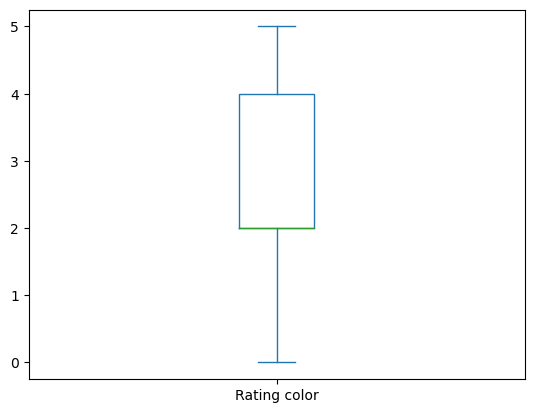

In [88]:
df['Rating color'].plot.box()

<AxesSubplot:>

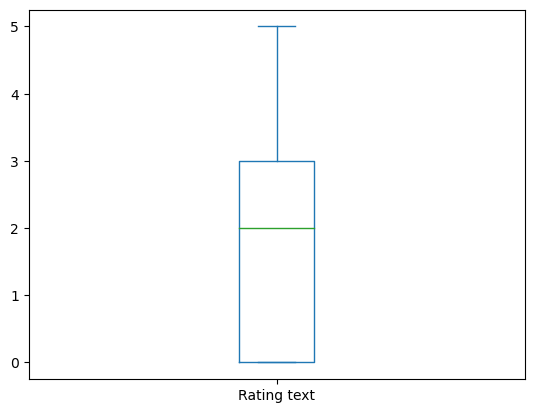

In [89]:
df['Rating text'].plot.box()

<AxesSubplot:>

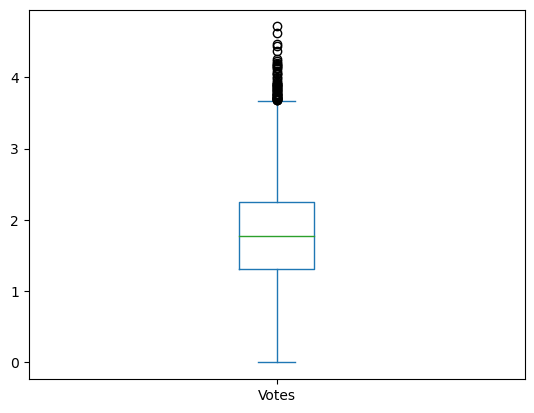

In [90]:
df['Votes'].plot.box()

<AxesSubplot:>

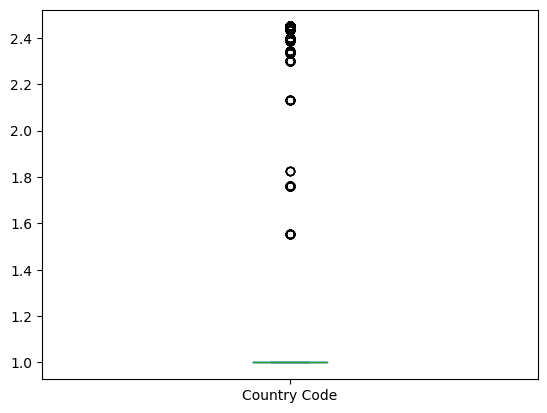

In [91]:
df['Country Code'].plot.box()

<AxesSubplot:>

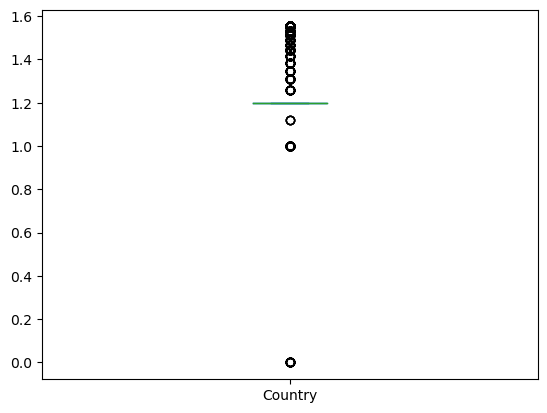

In [92]:
df['Country'].plot.box()

The above boxplots shows the presence of outliers in the data.

Here, we are going to remove the features as 'Address','Longitude','Latitude','Locality Verbose' and 'Switch to order menu' which are not that much usefull for the analysis.

In [93]:
DF1=df.drop('Address',axis=1,inplace=True)


In [94]:
DF1=df.drop('Longitude',axis=1,inplace=True)

In [95]:
DF1=df.drop('Latitude',axis=1,inplace=True)

In [96]:
DF1=df.drop('Switch to order menu',axis=1,inplace=True)

In [97]:
DF1=df.drop('Locality Verbose',axis=1,inplace=True)

In [98]:
DF1

In [99]:
from scipy.stats import zscore
outliers=df[['Restaurant ID', 'Restaurant Name','City',
       'Locality','Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes','Country Code','Country']]
z=np.abs(zscore(outliers))
z

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
0,0.310940,0.044706,0.228533,1.542277,0.135907,0.006154,8.518052,2.692181,0.587547,0.059771,1.319803,1.407131,1.977859,0.465442,1.070257,3.017720,1.164794
1,0.312458,0.224101,0.228533,0.206201,0.235186,0.000049,8.518052,2.692181,0.587547,0.059771,1.319803,1.209281,1.977859,0.465442,1.416601,3.017720,1.164794
2,0.312946,0.352904,0.142317,1.108527,1.323205,0.173743,8.518052,2.692181,0.587547,0.059771,2.424090,1.143331,1.308053,1.895070,0.992837,3.017720,1.164794
3,0.310841,0.491783,0.142317,0.645468,0.264329,0.018659,8.518052,0.371446,0.587547,0.059771,2.424090,1.473081,1.977859,0.465442,1.149401,3.017720,1.164794
4,0.311319,0.872592,0.142317,0.645468,0.256557,0.018659,8.518052,2.692181,0.587547,0.059771,2.424090,1.407131,1.977859,0.465442,0.910570,3.017720,1.164794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.356658,0.368580,2.659685,0.446821,1.599096,0.069428,5.744362,0.371446,0.587547,0.059771,1.319803,0.945480,1.308053,1.895070,1.586641,3.265885,2.491463
9547,0.357452,1.093055,2.659685,0.336009,1.620468,0.067878,5.744362,0.371446,0.587547,0.059771,1.319803,1.011430,1.308053,1.895070,1.754892,3.265885,2.491463
9548,0.356649,0.272635,2.659685,0.329677,0.233243,0.063845,5.744362,0.371446,0.587547,0.059771,2.424090,0.681680,1.371170,0.124686,1.481797,3.265885,2.491463
9549,0.356614,1.465464,2.659685,0.329677,1.296005,0.066947,5.744362,0.371446,0.587547,0.059771,2.424090,0.879530,1.308053,1.895070,1.668676,3.265885,2.491463


In [100]:
np.where(z>3)

(array([   0,    0,    1, ..., 9549, 9550, 9550], dtype=int64),
 array([ 6, 15,  6, ..., 15,  6, 15], dtype=int64))

In [101]:
z.iloc[0,15]

3.017720253208502

In [108]:
DF2=df[(z<3).all(axis=1)]
DF2.shape

(8573, 17)

In [110]:
print('Old data shape',df.shape)
print('New data shape',DF2.shape)

Old data shape (9551, 17)
New data shape (8573, 17)


In [112]:
print('Data loss percentage',((df.shape[0]-DF2.shape[0])/df.shape[0])*100)

Data loss percentage 10.239765469584338


In [105]:
Q1=df1.quantile(.25)
Q3=df1.quantile(.75)
IQR=Q3-Q1
IQR


Restaurant ID           1.805033e+07
Country Code            0.000000e+00
Longitude               2.006633e-01
Latitude                1.640456e-01
Average Cost for two    4.500000e+02
Price range             1.000000e+00
Aggregate rating        1.200000e+00
Votes                   1.260000e+02
dtype: float64

In [107]:
DF_new=df[(z<3).all(axis=1)]
DF_new

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
540,16659169,6948,25,181,1126,25,1.414214,0.0,0.0,0.0,2,3.7,5,2,2.367294,1.825437,1.122462
541,16643459,1740,32,218,508,25,1.414214,0.0,0.0,0.0,2,3.0,2,0,1.348006,1.825437,1.122462
542,16654702,3688,133,1159,1079,70,1.414214,0.0,0.0,0.0,4,4.3,1,5,2.426266,1.825437,1.122462
543,16668008,434,139,1197,115,25,1.414214,0.0,0.0,0.0,2,3.3,2,0,1.721190,1.825437,1.122462
706,2500023,3585,11,19,1338,800,2.000000,0.0,0.0,0.0,3,3.6,5,2,2.492883,1.000000,1.200937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,7100535,4144,137,1048,331,40,2.449490,0.0,0.0,0.0,2,4.3,1,5,2.322647,2.299907,1.307660
9333,7101000,4677,137,1048,1195,80,2.449490,0.0,0.0,0.0,4,4.2,1,5,2.294698,2.299907,1.307660
9334,7100938,7443,137,1177,1113,70,2.449490,0.0,0.0,0.0,4,3.7,5,2,2.253609,2.299907,1.307660
9335,7101081,1378,137,1177,791,110,2.449490,0.0,0.0,0.0,4,4.3,1,5,2.281409,2.299907,1.307660


In [113]:
print('Old data shape',df.shape)
print('New data shape',DF_new.shape)

Old data shape (9551, 17)
New data shape (8573, 17)


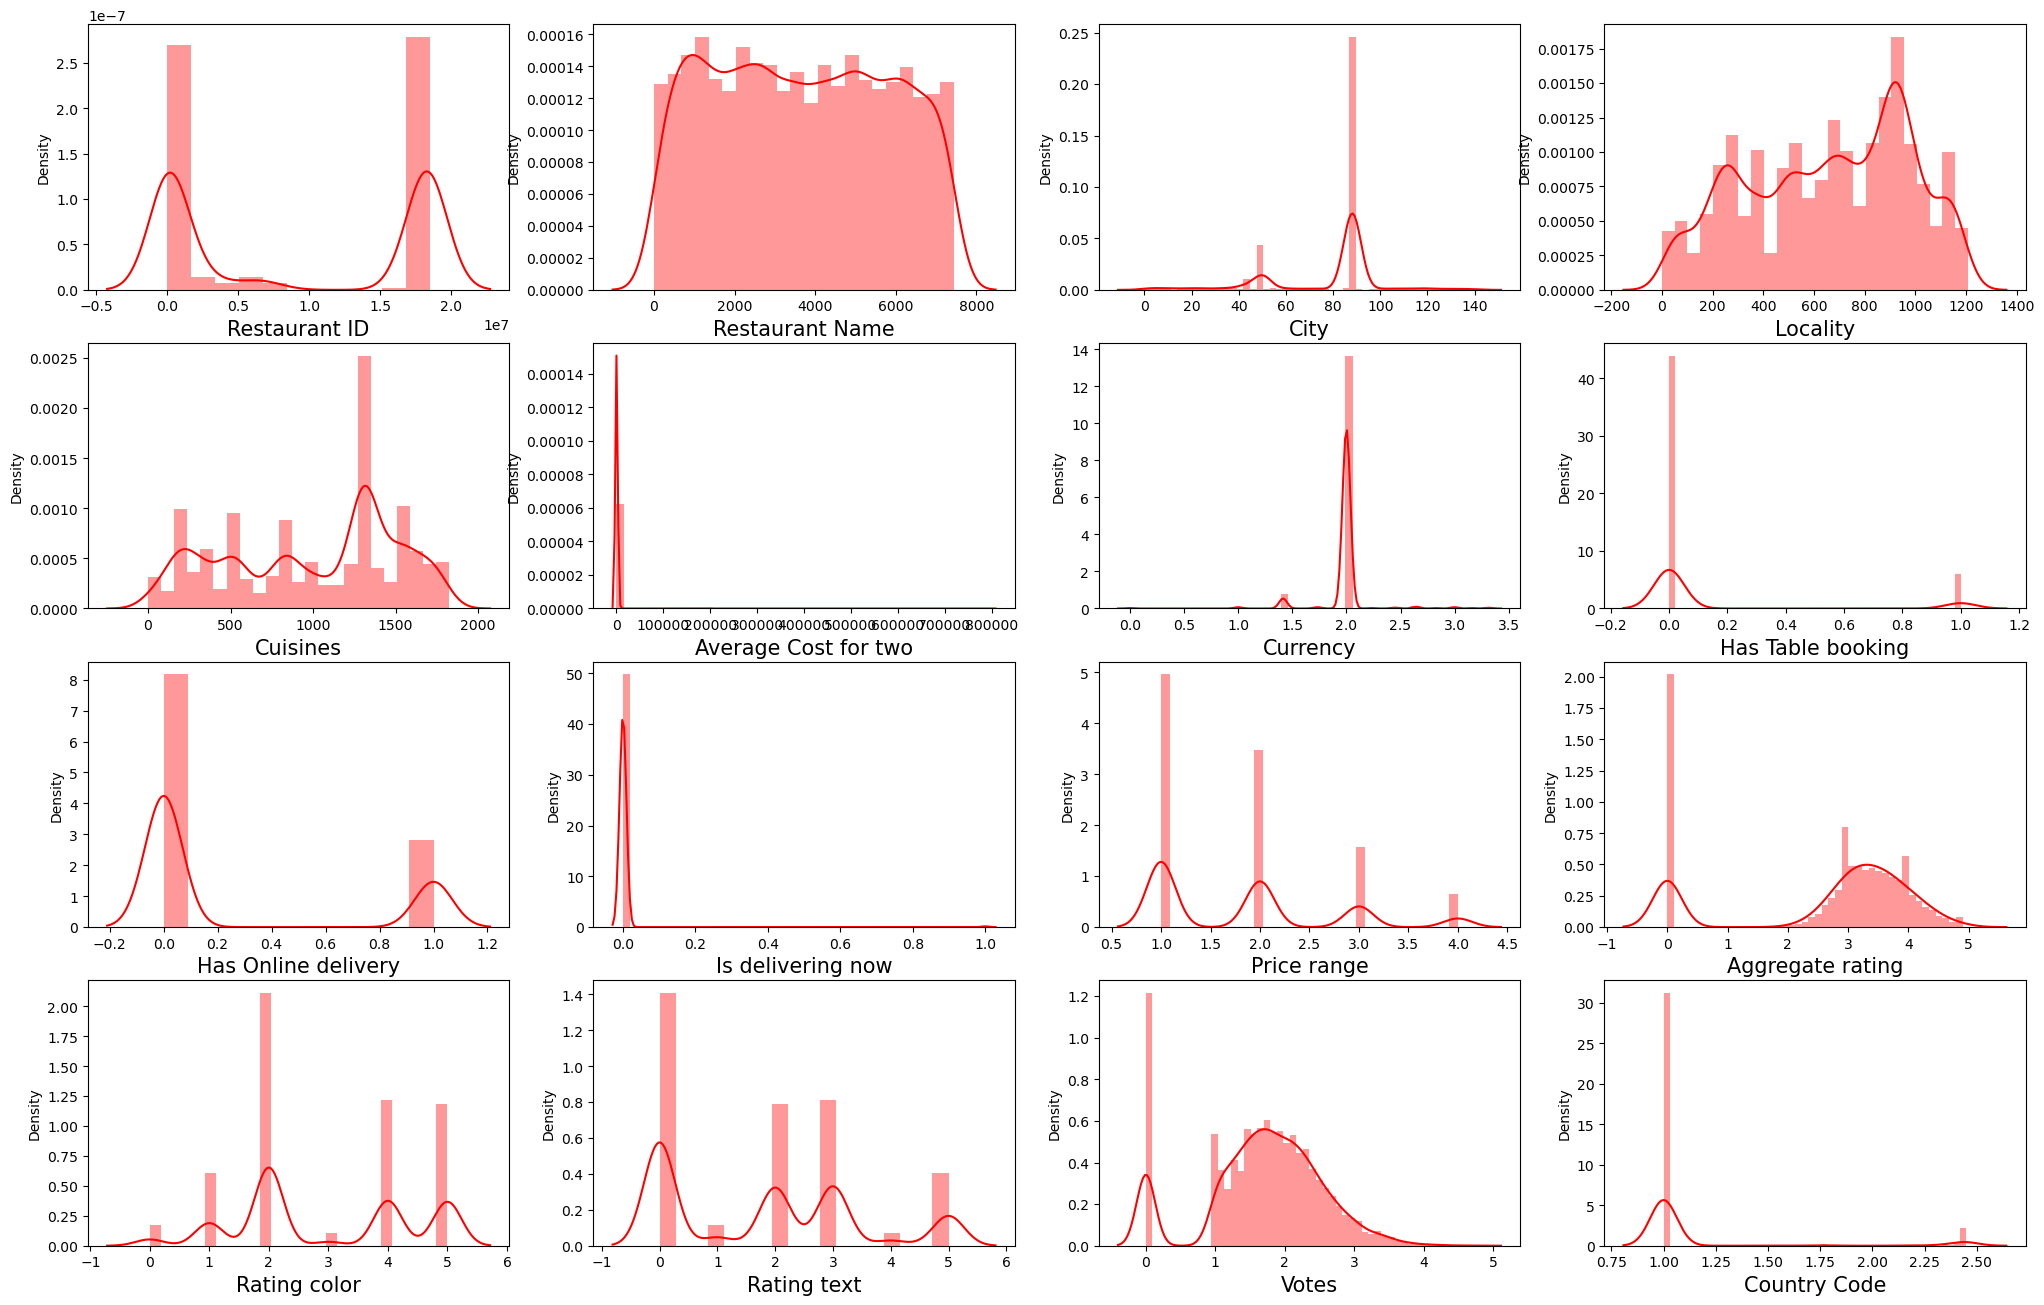

In [114]:
plt.figure(figsize=(25,20))
p=1
for i in outliers:
    if p<=16:
        ax=plt.subplot(5,4,p)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

Here, we have cleared all the outliers from the data using zscore and IQR method. We can see from the above plots, all the features are showing almost normal distribution.

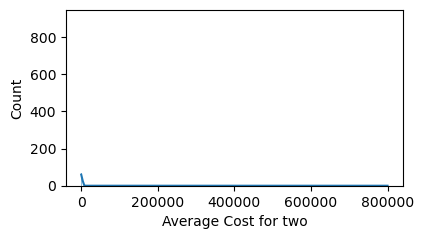

In [115]:
plt.figure(figsize=(20,16))
plt.subplot(6,4,3)
sns.histplot(df['Average Cost for two'],kde=True)
plt.show()

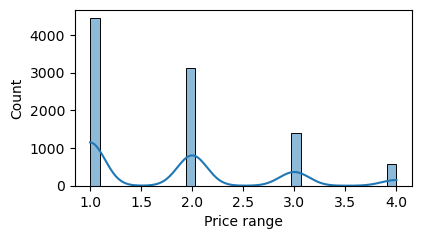

In [116]:
plt.figure(figsize=(20,16))
plt.subplot(6,4,3)
sns.histplot(df['Price range'],kde=True)
plt.show()

In [117]:
DF_new.skew()

Restaurant ID            0.137723
Restaurant Name          0.046405
City                    -1.355156
Locality                -0.303512
Cuisines                -0.345156
Average Cost for two     3.598194
Currency                 8.886675
Has Table booking        2.210769
Has Online delivery      0.997255
Is delivering now        0.000000
Price range              1.013248
Aggregate rating        -0.870171
Rating color             0.085566
Rating text              0.426314
Votes                   -0.369106
Country Code            14.046502
Country                 12.881297
dtype: float64

In [125]:
df['Currency']=np.log(df['Currency'])

In [126]:
df['Has Table booking']=np.log(df['Has Table booking'])

In [127]:
df['Country Code']=np.log(df['Country Code'])

In [128]:
df['Country ']=np.log(df['Country'])

In [129]:
DF_new.skew()

Restaurant ID            0.137723
Restaurant Name          0.046405
City                    -1.355156
Locality                -0.303512
Cuisines                -0.345156
Average Cost for two     3.598194
Currency                 8.886675
Has Table booking        2.210769
Has Online delivery      0.997255
Is delivering now        0.000000
Price range              1.013248
Aggregate rating        -0.870171
Rating color             0.085566
Rating text              0.426314
Votes                   -0.369106
Country Code            14.046502
Country                 12.881297
dtype: float64

<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

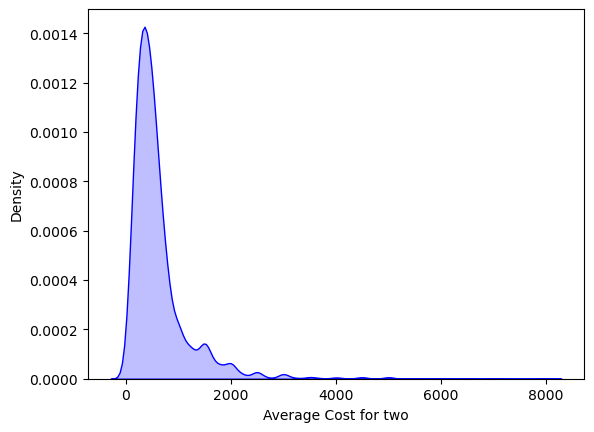

In [132]:
sns.distplot(DF_new['Average Cost for two'],color='b',kde_kws={'shade':True},hist=False)

<AxesSubplot:xlabel='Price range', ylabel='Density'>

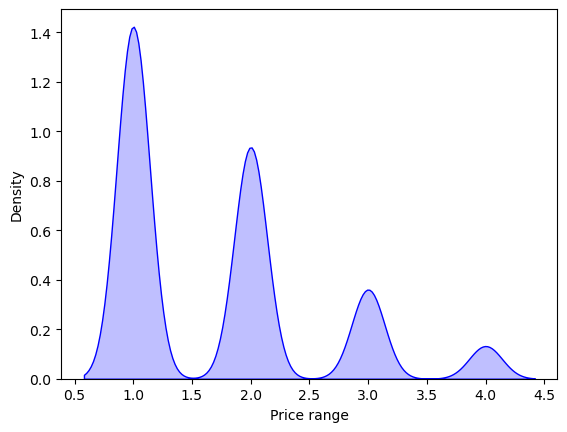

In [133]:
sns.distplot(DF_new['Price range'],color='b',kde_kws={'shade':True},hist=False)

In [135]:
DF_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'Country Code', 'Country'],
      dtype='object')

In [136]:
new_columns=['Average Cost for two', 'Price range','Restaurant ID', 'Restaurant Name', 'City', 'Locality', 'Cuisines',
        'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'Country Code', 'Country']

In [137]:
DF_new = DF_new.reindex(columns=new_columns)
DF_new

,Average Cost for two,Price range,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
540,25,2,16659169,6948,25,181,1126,1.414214,0.0,0.0,0.0,3.7,5,2,2.367294,1.825437,1.122462
541,25,2,16643459,1740,32,218,508,1.414214,0.0,0.0,0.0,3.0,2,0,1.348006,1.825437,1.122462
542,70,4,16654702,3688,133,1159,1079,1.414214,0.0,0.0,0.0,4.3,1,5,2.426266,1.825437,1.122462
543,25,2,16668008,434,139,1197,115,1.414214,0.0,0.0,0.0,3.3,2,0,1.721190,1.825437,1.122462
706,800,3,2500023,3585,11,19,1338,2.000000,0.0,0.0,0.0,3.6,5,2,2.492883,1.000000,1.200937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,40,2,7100535,4144,137,1048,331,2.449490,0.0,0.0,0.0,4.3,1,5,2.322647,2.299907,1.307660
9333,80,4,7101000,4677,137,1048,1195,2.449490,0.0,0.0,0.0,4.2,1,5,2.294698,2.299907,1.307660
9334,70,4,7100938,7443,137,1177,1113,2.449490,0.0,0.0,0.0,3.7,5,2,2.253609,2.299907,1.307660
9335,110,4,7101081,1378,137,1177,791,2.449490,0.0,0.0,0.0,4.3,1,5,2.281409,2.299907,1.307660


In [138]:
x=DF_new.iloc[:,2:]
x

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country Code,Country
540,16659169,6948,25,181,1126,1.414214,0.0,0.0,0.0,3.7,5,2,2.367294,1.825437,1.122462
541,16643459,1740,32,218,508,1.414214,0.0,0.0,0.0,3.0,2,0,1.348006,1.825437,1.122462
542,16654702,3688,133,1159,1079,1.414214,0.0,0.0,0.0,4.3,1,5,2.426266,1.825437,1.122462
543,16668008,434,139,1197,115,1.414214,0.0,0.0,0.0,3.3,2,0,1.721190,1.825437,1.122462
706,2500023,3585,11,19,1338,2.000000,0.0,0.0,0.0,3.6,5,2,2.492883,1.000000,1.200937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,7100535,4144,137,1048,331,2.449490,0.0,0.0,0.0,4.3,1,5,2.322647,2.299907,1.307660
9333,7101000,4677,137,1048,1195,2.449490,0.0,0.0,0.0,4.2,1,5,2.294698,2.299907,1.307660
9334,7100938,7443,137,1177,1113,2.449490,0.0,0.0,0.0,3.7,5,2,2.253609,2.299907,1.307660
9335,7101081,1378,137,1177,791,2.449490,0.0,0.0,0.0,4.3,1,5,2.281409,2.299907,1.307660


In [143]:
y=DF_new.iloc[:,0:2]
y

,Average Cost for two,Price range
540,25,2
541,25,2
542,70,4
543,25,2
706,800,3
...,...,...
9332,40,2
9333,80,4
9334,70,4
9335,110,4


In [144]:
x.shape

(8573, 15)

In [145]:
y.shape

(8573, 2)

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.433182,Restaurant ID
1,1.007016,Restaurant Name
2,1.020902,City
3,1.042117,Locality
4,1.027331,Cuisines
5,21155.096367,Currency
6,1.120966,Has Table booking
7,1.163839,Has Online delivery
8,NaN,Is delivering now
9,4.223238,Aggregate rating


As we can see that currency and country columns are showing very high VIF values, it is better to drop them.

In [150]:
DF_new.drop(['Currency','Country'],axis=1,inplace=True)

In [152]:
DF_new

,Average Cost for two,Price range,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country Code
540,25,2,16659169,6948,25,181,1126,0.0,0.0,0.0,3.7,5,2,2.367294,1.825437
541,25,2,16643459,1740,32,218,508,0.0,0.0,0.0,3.0,2,0,1.348006,1.825437
542,70,4,16654702,3688,133,1159,1079,0.0,0.0,0.0,4.3,1,5,2.426266,1.825437
543,25,2,16668008,434,139,1197,115,0.0,0.0,0.0,3.3,2,0,1.721190,1.825437
706,800,3,2500023,3585,11,19,1338,0.0,0.0,0.0,3.6,5,2,2.492883,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,40,2,7100535,4144,137,1048,331,0.0,0.0,0.0,4.3,1,5,2.322647,2.299907
9333,80,4,7101000,4677,137,1048,1195,0.0,0.0,0.0,4.2,1,5,2.294698,2.299907
9334,70,4,7100938,7443,137,1177,1113,0.0,0.0,0.0,3.7,5,2,2.253609,2.299907
9335,110,4,7101081,1378,137,1177,791,0.0,0.0,0.0,4.3,1,5,2.281409,2.299907


In [155]:
x1=DF_new.iloc[:,2:]
x1

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country Code
540,16659169,6948,25,181,1126,0.0,0.0,0.0,3.7,5,2,2.367294,1.825437
541,16643459,1740,32,218,508,0.0,0.0,0.0,3.0,2,0,1.348006,1.825437
542,16654702,3688,133,1159,1079,0.0,0.0,0.0,4.3,1,5,2.426266,1.825437
543,16668008,434,139,1197,115,0.0,0.0,0.0,3.3,2,0,1.721190,1.825437
706,2500023,3585,11,19,1338,0.0,0.0,0.0,3.6,5,2,2.492883,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,7100535,4144,137,1048,331,0.0,0.0,0.0,4.3,1,5,2.322647,2.299907
9333,7101000,4677,137,1048,1195,0.0,0.0,0.0,4.2,1,5,2.294698,2.299907
9334,7100938,7443,137,1177,1113,0.0,0.0,0.0,3.7,5,2,2.253609,2.299907
9335,7101081,1378,137,1177,791,0.0,0.0,0.0,4.3,1,5,2.281409,2.299907


In [201]:
y1=DF_new.iloc[:,0:2]
y1

,Average Cost for two,Price range
540,25,2
541,25,2
542,70,4
543,25,2
706,800,3
...,...,...
9332,40,2
9333,80,4
9334,70,4
9335,110,4


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [203]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y2,test_size=.30,random_state=42)

In [204]:
x1_train.shape

(6001, 13)

In [205]:
x1_test.shape

(2572, 13)

In [206]:
y1_train.shape

(6001, 2)

In [207]:
y1_test.shape

(2572, 2)

In [208]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,y1_train)
pred_lr=lr.predict(x1_test)
pred_lr

array([[2.44678244e+02, 9.80633898e-01],
       [4.39214221e+02, 1.45679144e+00],
       [5.16772351e+02, 1.49004095e+00],
       ...,
       [1.80394187e+03, 3.38573246e+00],
       [3.87735240e+02, 1.31505277e+00],
       [6.39365437e+02, 1.77237605e+00]])

In [209]:
print('r2 score:',r2_score(y1_test,pred_lr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_lr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_lr)))

r2 score: 0.478435185136748
mean_squared_error: 92456.77188214849
root mean_squared_error: 304.0670516220863


In [210]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
pred_rfr=rfr.predict(x1_test)
pred_rfr

array([[2.8020e+02, 1.1200e+00],
       [2.7000e+02, 1.0400e+00],
       [4.2170e+02, 1.3600e+00],
       ...,
       [1.3845e+03, 3.0000e+00],
       [2.8400e+02, 1.1200e+00],
       [6.1400e+02, 1.9400e+00]])

In [211]:
print('r2 score:',r2_score(y1_test,pred_rfr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_rfr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_rfr)))

r2 score: 0.6582346739064816
mean_squared_error: 55406.28446164463
root mean_squared_error: 235.38539559973688


In [212]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
pred_knn=knn.predict(x1_test)
pred_knn

array([[600. ,   2. ],
       [380. ,   1.4],
       [690. ,   1.6],
       ...,
       [450. ,   1.4],
       [500. ,   1.6],
       [760. ,   2.2]])

In [213]:
print('r2 score:',r2_score(y1_test,pred_knn))
print('mean_squared_error:', mean_squared_error(y1_test,pred_knn))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_knn)))

r2 score: 0.014219700502459243
mean_squared_error: 178701.17578538103
root mean_squared_error: 422.7306184621372


In [214]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x1_train,y1_train)
pred_ls=ls.predict(x1_test)
pred_ls

array([[2.45087370e+02, 1.41925985e+00],
       [4.37263544e+02, 1.57688390e+00],
       [5.14774487e+02, 1.79738590e+00],
       ...,
       [1.78760930e+03, 1.56966971e+00],
       [3.86106964e+02, 1.46566542e+00],
       [6.37352808e+02, 1.91501435e+00]])

In [215]:
print('r2 score:',r2_score(y1_test,pred_ls))
print('mean_squared_error:', mean_squared_error(y1_test,pred_ls))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_ls)))

r2 score: 0.26474635187302115
mean_squared_error: 92546.20835009895
root mean_squared_error: 304.21408308968694


In [216]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x1_train,y1_train)
pred_rdg=rdg.predict(x1_test)
pred_rdg

array([[2.44513499e+02, 9.80679595e-01],
       [4.39269012e+02, 1.45686323e+00],
       [5.16591335e+02, 1.49053024e+00],
       ...,
       [1.80274087e+03, 3.38420001e+00],
       [3.87777491e+02, 1.31508344e+00],
       [6.39685122e+02, 1.77285277e+00]])

In [217]:
print('r2 score:',r2_score(y1_test,pred_rdg))
print('mean_squared_error:', mean_squared_error(y1_test,pred_rdg))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_rdg)))

r2 score: 0.4784498644462358
mean_squared_error: 92460.93638248855
root mean_squared_error: 304.073899541688


In [218]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr=dtr.predict(x1_test)
pred_dtr

array([[3.0e+02, 1.0e+00],
       [2.0e+02, 1.0e+00],
       [3.5e+02, 1.0e+00],
       ...,
       [1.1e+03, 3.0e+00],
       [2.5e+02, 1.0e+00],
       [6.0e+02, 2.0e+00]])

In [219]:
print('r2 score:',r2_score(y1_test,pred_dtr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_dtr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_dtr)))

r2 score: 0.23406137933763477
mean_squared_error: 136829.55793157077
root mean_squared_error: 369.9047957671957


In [220]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1_train)
pred_etr=etr.predict(x1_test)
pred_etr

array([[4.4940e+02, 1.3300e+00],
       [3.4250e+02, 1.2000e+00],
       [4.1600e+02, 1.4100e+00],
       ...,
       [1.5415e+03, 3.0700e+00],
       [2.8500e+02, 1.1100e+00],
       [5.3400e+02, 1.7700e+00]])

In [221]:
print('r2 score:',r2_score(y1_test,pred_etr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_etr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_etr)))

r2 score: 0.6155162320235141
mean_squared_error: 64023.259056687406
root mean_squared_error: 253.0281783847155


From the above model fitting and performance score, we can say that, RandomForestRegressor is the best fitting and best performing models,which is giving a performance score as 65%..

In [222]:
from sklearn.model_selection import cross_val_score

In [223]:
score= cross_val_score(lr,x1,y1,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_lr,y1_test)) - (score.mean()*100))

[0.2958072  0.47218776 0.44151833 0.46058732 0.41306064]
0.4166322479848318
Difference between r2 score and cross validation score is- -41.75966432688217


In [224]:
score1= cross_val_score(knn,x1,y1,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_rfr,y1_test)) - (score1.mean()*100))

[-0.06066561 -0.02194772 -0.18902694  0.00690903 -0.27633209]
-0.10821266611832236
Difference between r2 score and cross validation score is- 11.246338002970342


In [225]:
score2= cross_val_score(knn,x1,y1,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_knn,y2_test)) - (score2.mean()*100))

[-0.06066561 -0.02194772 -0.18902694  0.00690903 -0.27633209]
-0.10821266611832236
Difference between r2 score and cross validation score is- 8.411222325657086


In [226]:
score3= cross_val_score(ls,x1,y1,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_ls,y1_test)) - (score3.mean()*100))

[0.21630053 0.22896939 0.15585988 0.19978355 0.1961431 ]
0.1994112902083497
Difference between r2 score and cross validation score is- -33.52144303800463


In [227]:
score4= cross_val_score(rdg,x1,y1,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_rdg,y1_test)) - (score4.mean()*100))

[0.29759451 0.47221854 0.44146863 0.46038161 0.41471404]
0.41727546595909104
Difference between r2 score and cross validation score is- -41.82641181236208


In [228]:
score5= cross_val_score(dtr,x1,y1,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_dtr,y1_test)) - (score5.mean()*100))

[-0.72821732  0.2253503   0.12600101  0.42803229 -0.8705814 ]
-0.16388302437031946
Difference between r2 score and cross validation score is- 16.650894191526923


In [229]:
score6= cross_val_score(etr,x1,y1,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_etr,y1_test)) - (score6.mean()*100))

[0.38476235 0.5407065  0.54984816 0.58816467 0.27262392]
0.4672211199899354
Difference between r2 score and cross validation score is- -46.34785373140078


In [230]:
import pickle

In [231]:
filename='Zomato Restaurant.pkl'
pickle.dump(rfr,open('Zomato Restaurant.pkl','wb'))


In [232]:
loaded_model1=pickle.load(open('Zomato Restaurant.pkl','rb'))
result=loaded_model1.score(x1_test,y2_test)
print(result*100)

65.82346739064816


In [233]:
conclusion=pd.DataFrame([loaded_model1.predict(x1_test)[:],(y1_test)[0:2]],index=['Predicted','Original'])
conclusion

,0
Predicted,"[[280.2, 1.12], [270.0, 1.04], [421.7, 1.36], ..."
Original,Average Cost for two Price range 7395 ...


In [234]:
def pred_etr(p):
    p=p.reshape(1,-1)
    pred=etr.predict(p)
    print('Response type',pred)

In [235]:
p=np.array([7101000,4677,137,1048,1195,0.0,0.0,0.0,4.2,1,5,2.294698,2.299907])
pred_etr(p)

Response type [[86.85  3.81]]
